In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
!pip install statsmodels


     |████████████████████████████████| 9.9 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 2.2 MB/s eta 0:00:01


In [2]:
chocolura = pd.read_csv('inputs/chocolura.csv')
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
print('Shape: ', chocolura.shape, 'Nulos ', chocolura.isna().sum().sum())
chocolura.dtypes

Shape:  (24, 2) Nulos  0


mes       datetime64[ns]
vendas             int64
dtype: object

In [3]:
chocolura = pd.read_csv('inputs/chocolura.csv')
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
print('Shape: ', chocolura.shape, 'Nulos ', chocolura.isna().sum().sum())
chocolura.dtypes
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


In [4]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data = dataset)
    ax = plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data = dataset)
    ax = plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data = dataset)
    ax = ax

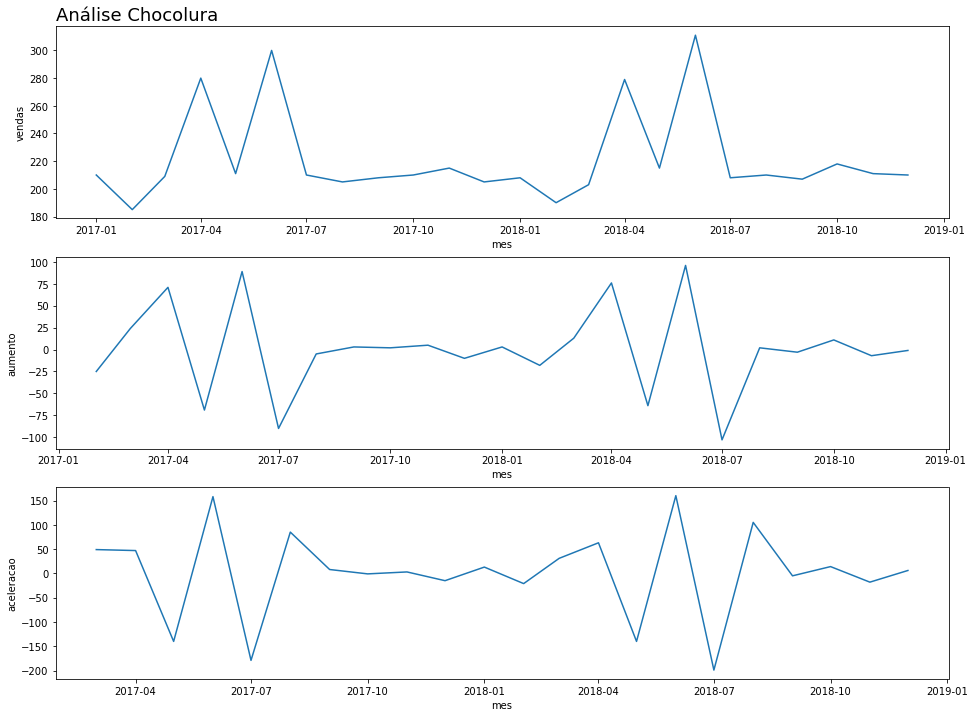

In [5]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise Chocolura')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

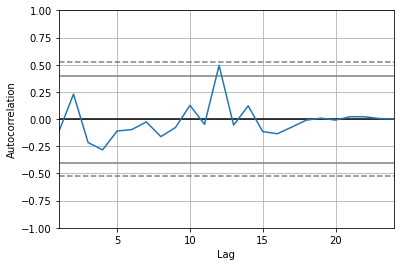

In [6]:
autocorrelation_plot(chocolura['vendas'])

In [7]:
vendas_por_dia = pd.read_csv('inputs/vendas_por_dia.csv')
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
print('Shape: ', vendas_por_dia.shape, 'Nulos ', vendas_por_dia.isna().sum().sum())
vendas_por_dia.dtypes

Shape:  (61, 4) Nulos  3


dia           datetime64[ns]
vendas                 int64
aumento              float64
aceleracao           float64
dtype: object

In [8]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


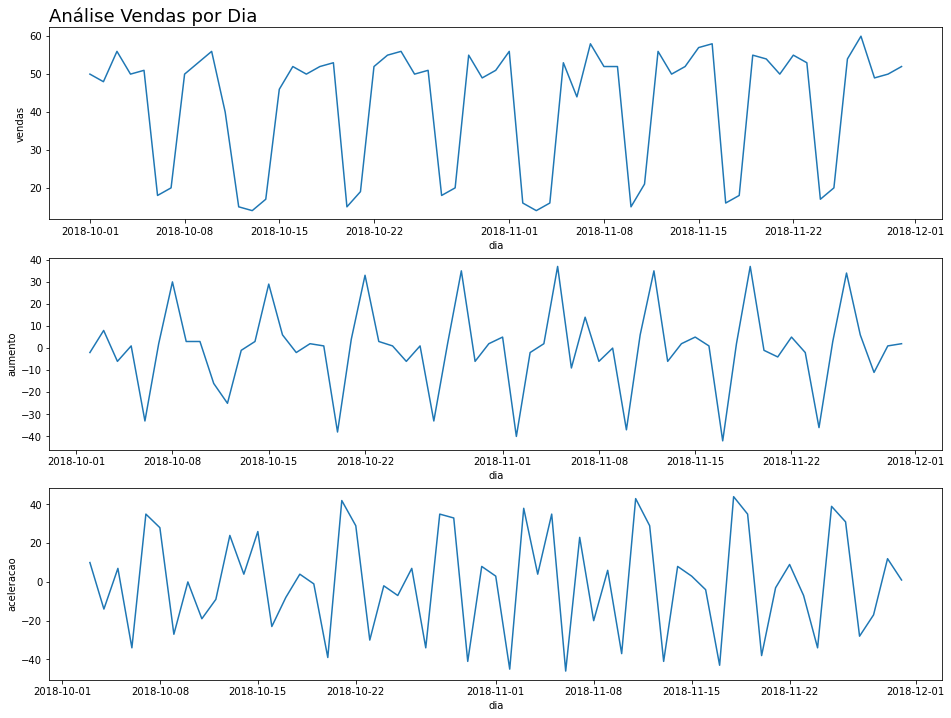

In [9]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise Vendas por Dia')

In [10]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [11]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [12]:
dias_br = {'Monday' : 'Segunda', 'Tuesday' : 'Terça', 'Wednesday' : 'Quarta', 'Thursday' : 'Quinta',
                'Friday' : 'Sexta', 'Saturday' : 'Sábado', 'Sunday' : 'Domingo'}

In [13]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_br)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [14]:
vendas_agrupadas = vendas_por_dia.groupby(['dia_da_semana']).mean().round()
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

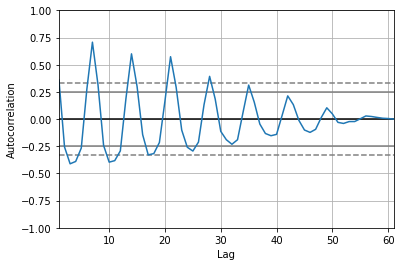

In [15]:
autocorrelation_plot(vendas_por_dia['vendas'])

In [16]:
cafelura = pd.read_csv('inputs/cafelura.csv')
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
print('Shape: ', cafelura.shape, 'Nulos ', cafelura.isna().sum().sum())
cafelura.dtypes
cafelura['aumento'] = cafelura['vendas'].diff()
cafelura['aceleracao'] = cafelura['aumento'].diff()
cafelura.head()

Shape:  (24, 2) Nulos  0


,mes,vendas,aumento,aceleracao
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


In [18]:
def plotar(titulo, x, y, xlabel, ylabel, dataset, largura=12, altura=6):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(largura,altura)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax=ax

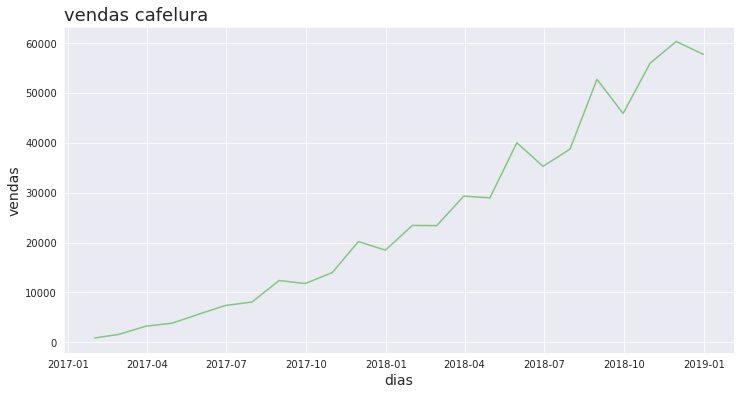

In [20]:
plotar('vendas cafelura', 'mes', 'vendas', 'dias', 'vendas', cafelura)

In [23]:
dias_fds = pd.read_csv('inputs/dias_final_de_semana.csv')
dias_fds

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9
5,9
6,8
7,10
8,8
9,8


In [25]:
valores_fds = dias_fds['quantidade_de_dias'].values

In [26]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / valores_fds
cafelura.head()

,mes,vendas,aumento,aceleracao,vendas_normalizadas
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


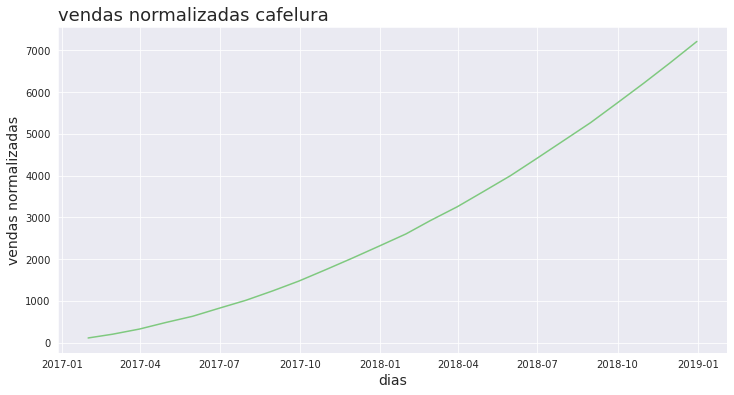

In [27]:
plotar('vendas normalizadas cafelura', 'mes', 'vendas_normalizadas', 'dias', 'vendas normalizadas', cafelura)

In [29]:
import statsmodels

In [30]:
statsmodels.__version__

'0.13.2'